# Topic:        Challenge Set 6
# Subject:      Pandas Challenges
# Date:         02/06/2017
# Name:         Rosie Hoyem

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import seaborn as sns

%matplotlib inline

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
#np.random.seed(2)

def f(x):
    return 2*np.log(x) + np.random.normal()

In [3]:
X = np.random.random(100)
y = f(X)

In [4]:
X = X.reshape(-1, 1)

In [5]:
x_plot = np.linspace(0, 1, 100)
x_plot = x_plot.reshape(-1, 1)

In [6]:
degree = 2
y_quad = make_pipeline(PolynomialFeatures(degree), LinearRegression())
y_quad.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


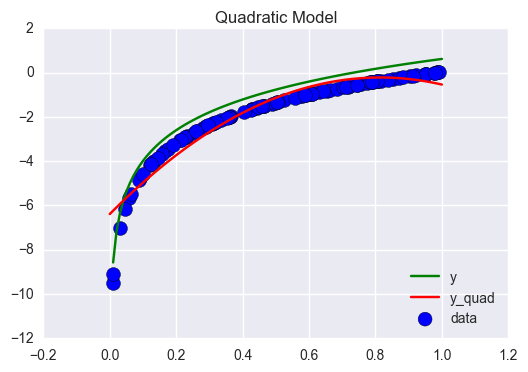

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label = 'y', color='green')
ax.plot(x_plot, y_quad.predict(x_plot), label='y_quad', color='red')
ax.scatter(X, y, label='data', s=100)
ax.legend(loc='lower right')
ax.set_title('Quadratic Model');

##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

In [68]:
import random

def simulate_model(x_array, beta_0, beta_1, beta_2, noise_std):
    epsilon_array = [random.gauss(0, noise_std) for x in x_array]
    y_array = beta_0 + (beta_1 * x_array) + (beta_2 * x_array**2) + epsilon_array
    return y_array

# def f(x):
#     y.append(2 + 2*x + 6*x**2 + np.random.normal(0,100))

In [72]:
# X2 = np.linspace(0,1,100).reshape(-1, 1)
# y2 = f(X2)

X2 = np.linspace(10,1e4, num = 100)
y2 = simulate_model(X, beta_0=500, beta_1=5, beta_2=8, noise_std=3)

In [73]:
print(X2.shape)
print(y2.shape)

(100,)
(100, 100)


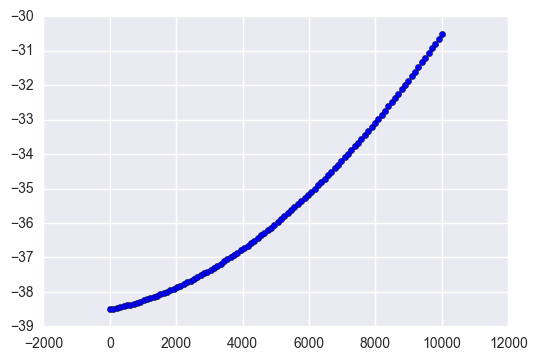

In [74]:
plt.scatter(X2, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3)

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

In [76]:
results = sm.OLS(y2,X2).fit()

In [78]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, results.predict(X_train))

73697.015689546723

In [79]:
mean_squared_error(y_test, results.predict(X_test))

43700.552461601066

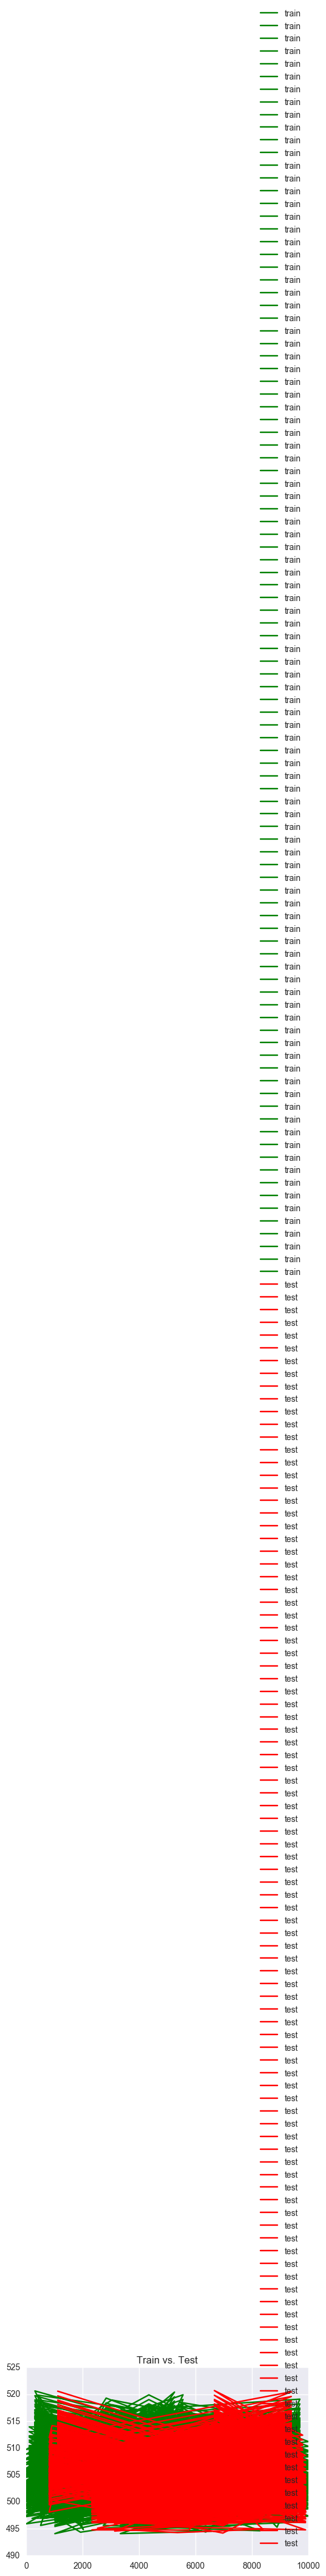

In [80]:
fig, ax = plt.subplots(1,1)
ax.plot(X_train, y_train, label = 'train', color='green')
ax.plot(X_test, y_test, label='test', color='red')
ax.legend(loc='lower right')
ax.set_title('Train vs. Test');


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error

In [81]:
# Step through degrees from 0 to 8 and store the training and test (generalization) error.
train_error = np.empty(9)
test_error = np.empty(9)
for degree in range(9):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    lr = LinearRegression()
    
    model = lr.fit(X_train_poly, y_train)
    
    train_error[degree] = mean_squared_error(y_train, model.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, model.predict(X_test))


/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature 

ValueError: Found input variables with inconsistent numbers of samples: [1, 70]

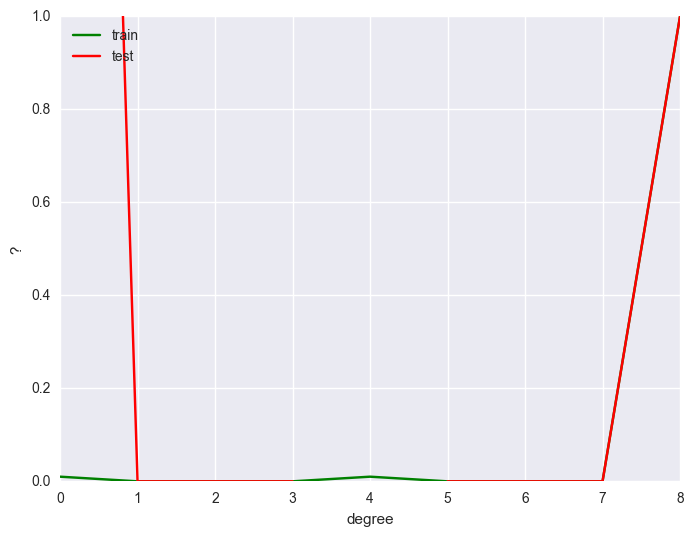

In [82]:
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(9), train_error, color='green', label='train')
plt.plot(np.arange(9), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('?')
plt.xlabel('degree')
plt.legend(loc='upper left')

##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [ ]:
# Step through degrees from 0 to 8 and store the training and test (generalization) error.
train_error = np.empty(20)
test_error = np.empty(20)
for i in range(20):
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, model.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, model.predict(X_test))